[0-1]basic model (learning_rate=0.0001, epochs=5, batch_size=64)

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8531 - loss: 0.4729 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 0.9850 - val_loss: 0.0499
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9900 - val_loss: 0.0345
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9882 - val_loss: 0.0424
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0449
Test accuracy: 0.9891999959945679


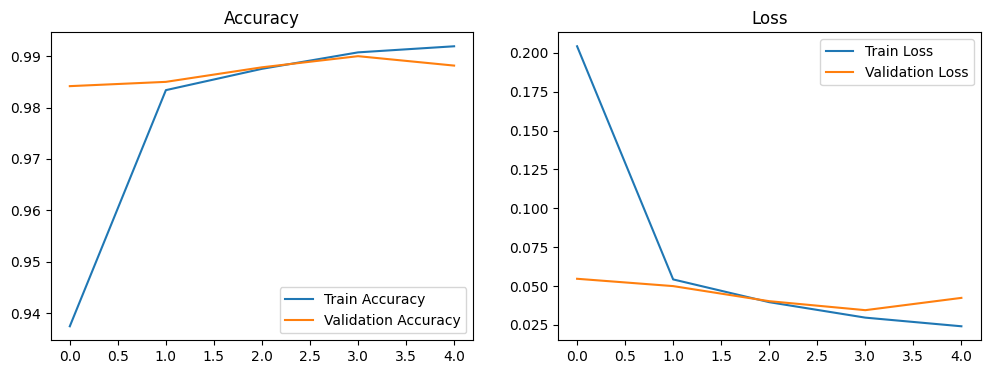

In [ ]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


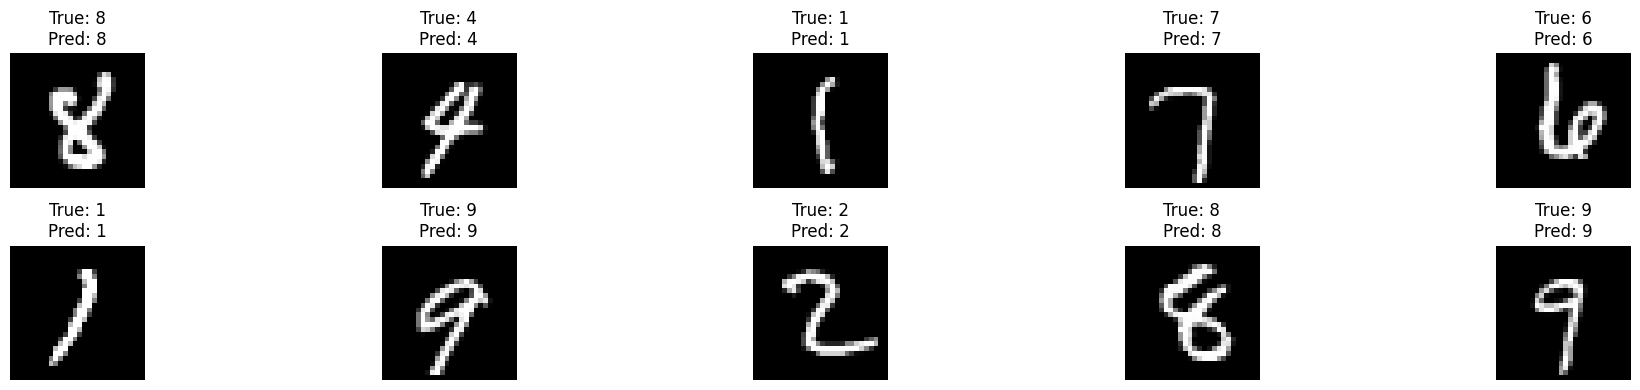

In [ ]:
# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

[1-1]Adjust learning_rate (learning_rate=0.001, epochs=5, batch_size=64)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8676 - loss: 0.4388 - val_accuracy: 0.9832 - val_loss: 0.0611
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9872 - val_loss: 0.0483
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9863 - val_loss: 0.0494
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9918 - val_loss: 0.0315
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0235 - val_accuracy: 0.9912 - val_loss: 0.0306
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0366
Test accuracy: 0.9919000267982483


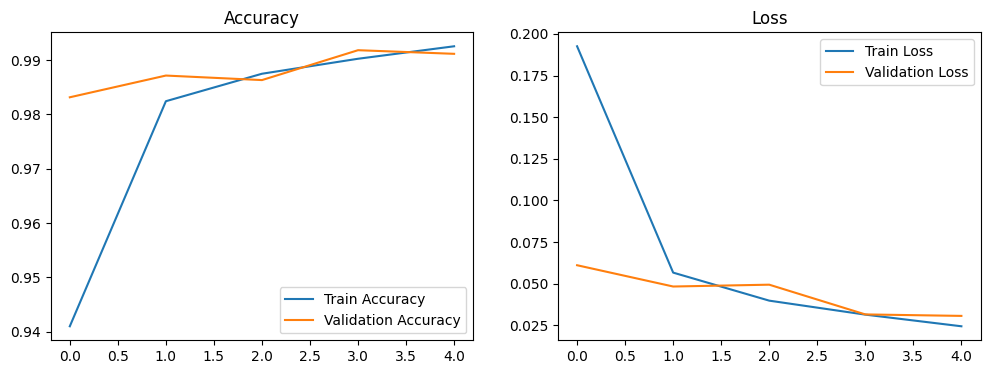

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


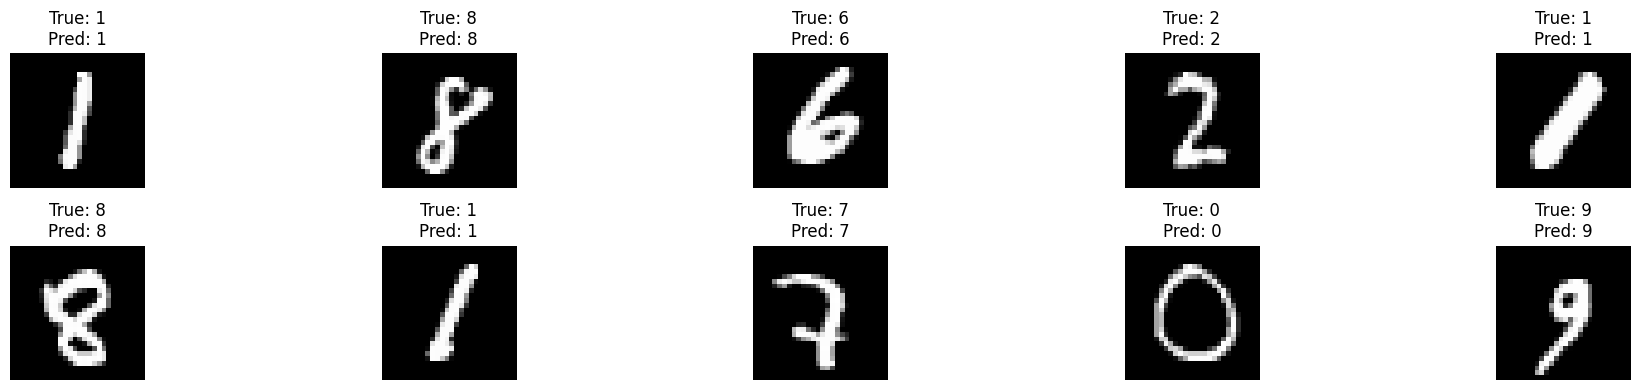

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()



[1-2]Adjust learning_rate (learning_rate=0.01, epochs=5, batch_size=64)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8873 - loss: 0.3385 - val_accuracy: 0.9812 - val_loss: 0.0650
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9787 - loss: 0.0764 - val_accuracy: 0.9875 - val_loss: 0.0480
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9805 - loss: 0.0670 - val_accuracy: 0.9790 - val_loss: 0.0831
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0605 - val_accuracy: 0.9823 - val_loss: 0.0680
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9836 - loss: 0.0594 - val_accuracy: 0.9842 - val_loss: 0.0655
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0624
Test accuracy: 0.9848999977111816


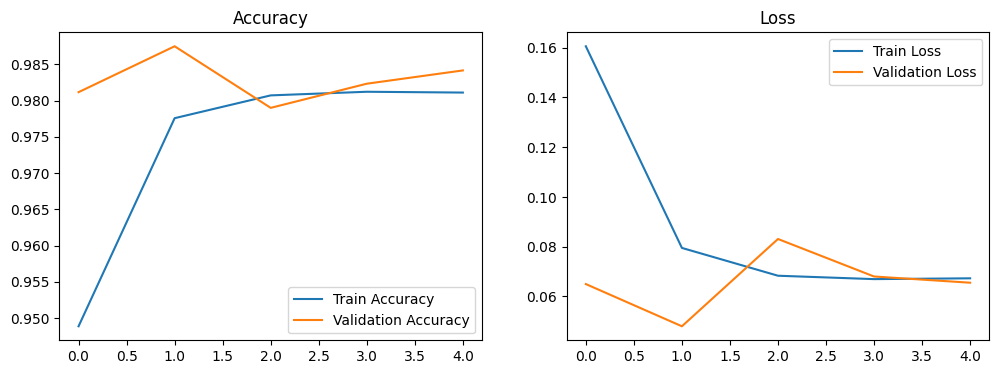

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


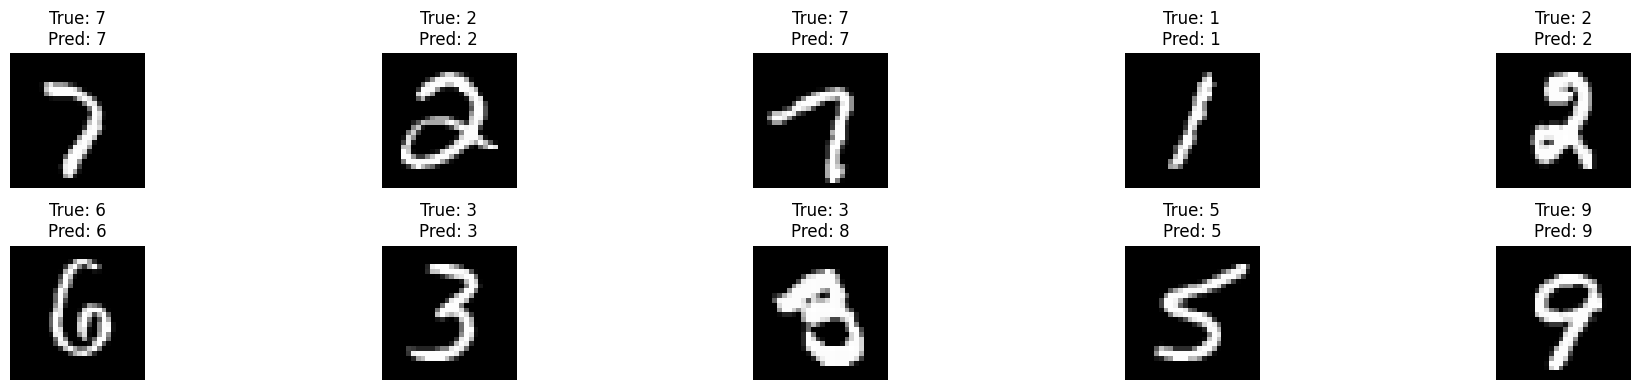

In [4]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()



[2-1]Adjust epochs to 10 (learning_rate=0.001, epochs=10, batch_size=64)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8632 - loss: 0.4538 - val_accuracy: 0.9872 - val_loss: 0.0542
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9816 - loss: 0.0584 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0423 - val_accuracy: 0.9867 - val_loss: 0.0447
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9907 - loss: 0.0301 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9907 - val_loss: 0.0370
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9902 - val_loss: 0.0375
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9946 - loss: 0.0150 - val_accuracy: 0.9913 - val_loss: 0.0325
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.

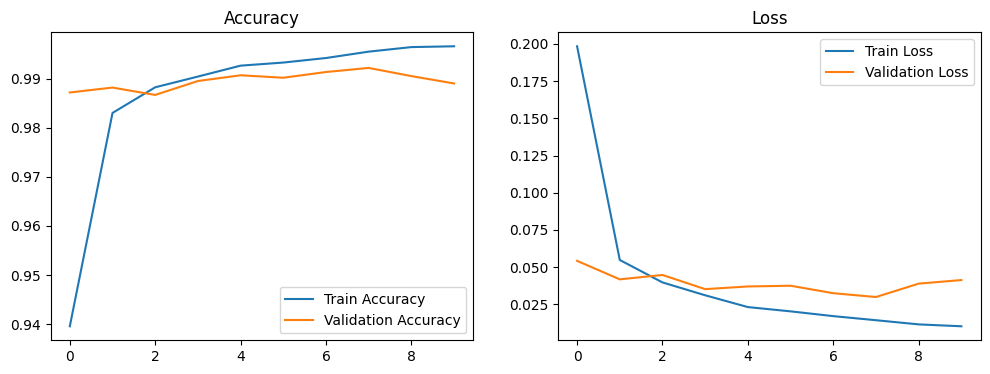

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


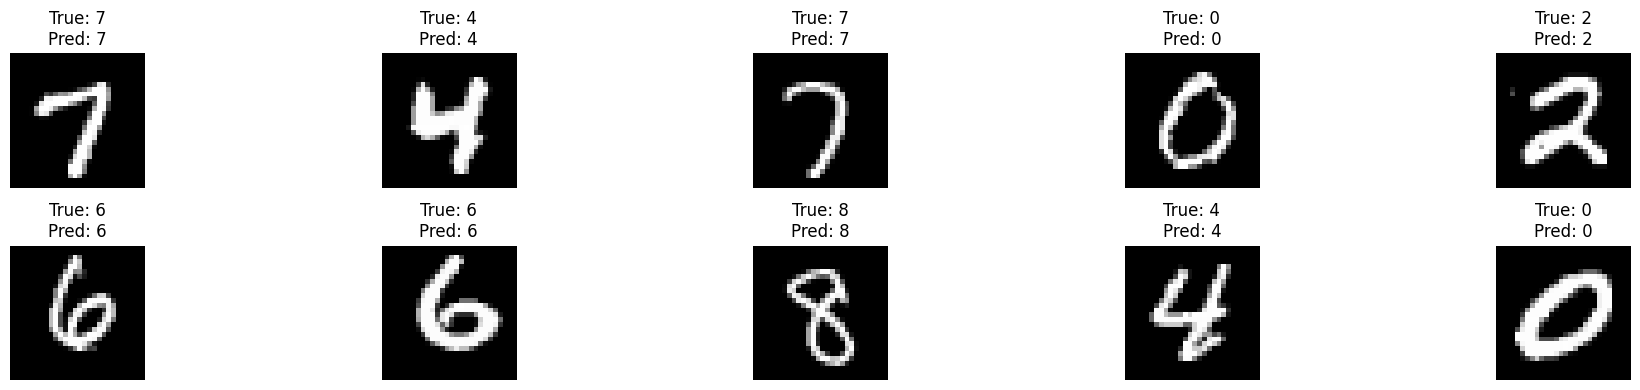

In [10]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()




[2-2]Adjust epochs to 20 (learning_rate=0.001, epochs=20, batch_size=64)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8590 - loss: 0.4629 - val_accuracy: 0.9782 - val_loss: 0.0732
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9823 - loss: 0.0557 - val_accuracy: 0.9882 - val_loss: 0.0409
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0374 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9923 - loss: 0.0267 - val_accuracy: 0.9907 - val_loss: 0.0347
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0216 - val_accuracy: 0.9883 - val_loss: 0.0440
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9888 - val_loss: 0.0405
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9885 - val_loss: 0.0462
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9951 - loss: 0.0130 - val_accuracy: 0.

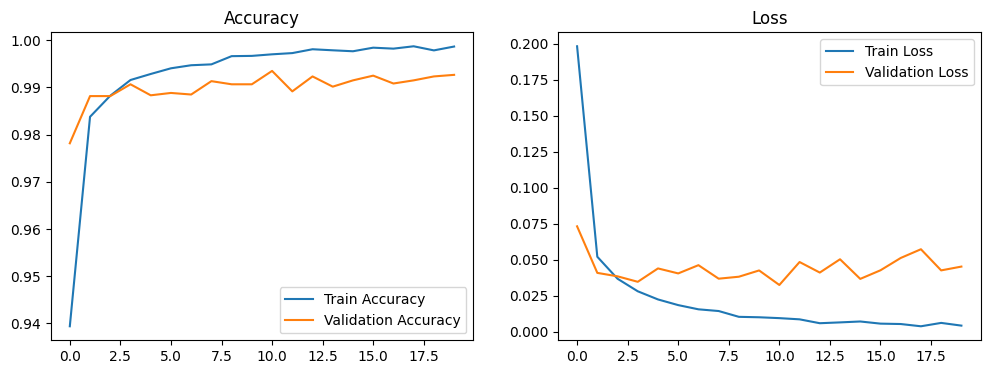

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


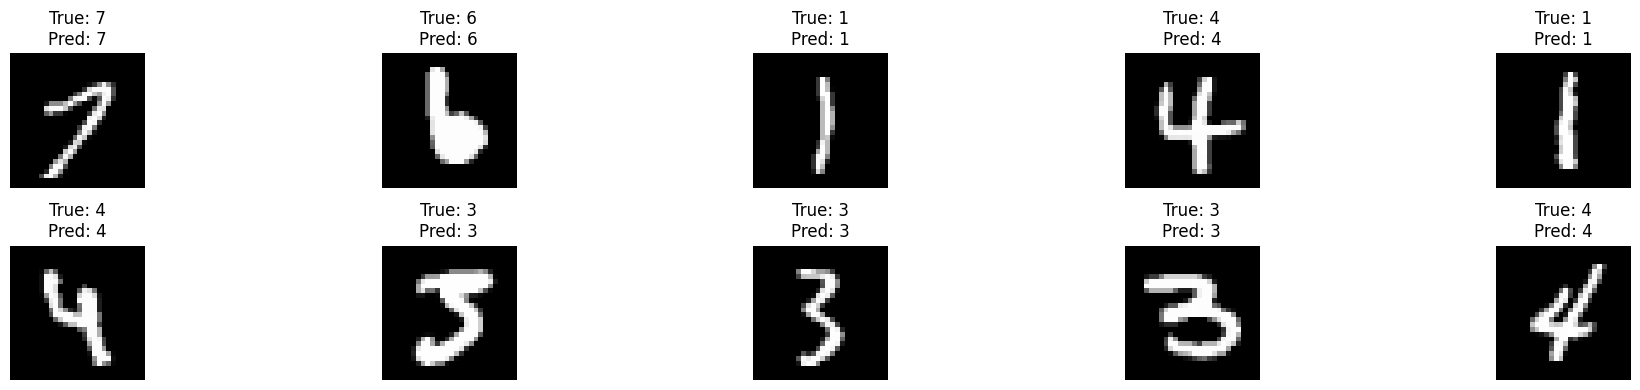

In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()




[3-1]Adjust batch_size to 128(learning_rate=0.001, epochs=5, batch_size=128)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8248 - loss: 0.5940 - val_accuracy: 0.9768 - val_loss: 0.0803
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9773 - loss: 0.0705 - val_accuracy: 0.9890 - val_loss: 0.0425
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9865 - loss: 0.0443 - val_accuracy: 0.9877 - val_loss: 0.0413
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.9895 - val_loss: 0.0383
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0422
Test accuracy: 0.9884999990463257


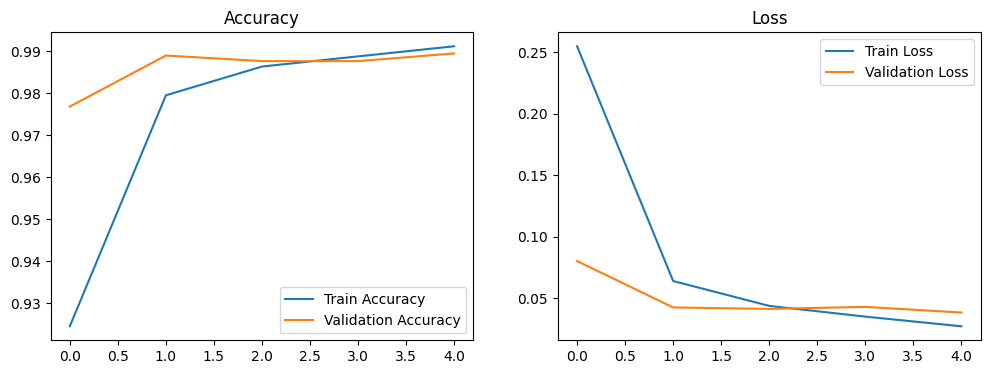

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


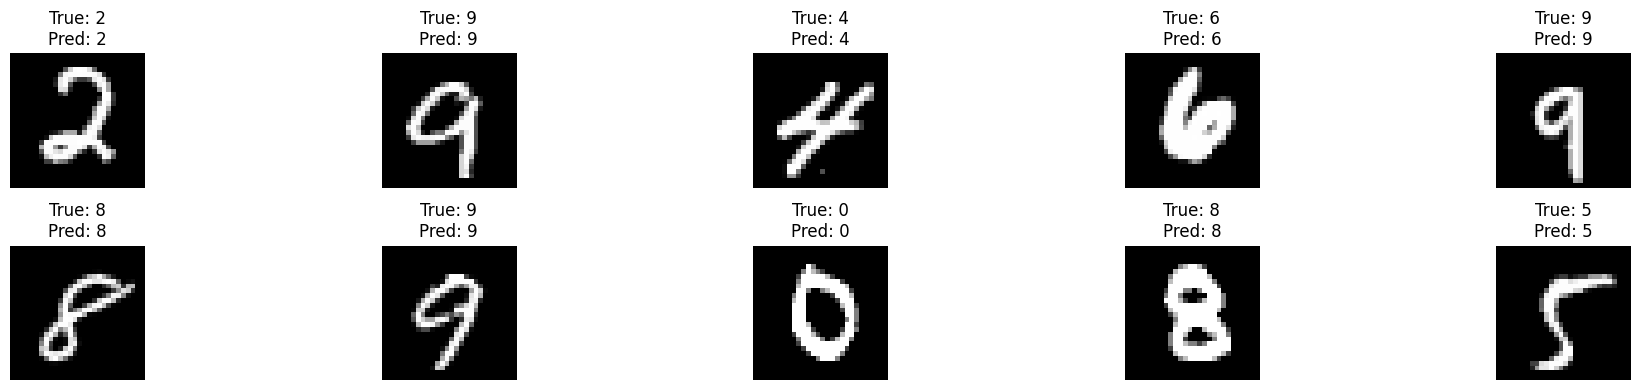

In [11]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()




[3-2]Adjust batch_size to 256(learning_rate=0.001, epochs=5, batch_size=256)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7420 - loss: 0.8206 - val_accuracy: 0.9753 - val_loss: 0.0871
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9714 - loss: 0.0922 - val_accuracy: 0.9850 - val_loss: 0.0564
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9829 - loss: 0.0585 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9885 - val_loss: 0.0420
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9887 - val_loss: 0.0404
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0447
Test accuracy: 0.9894000291824341


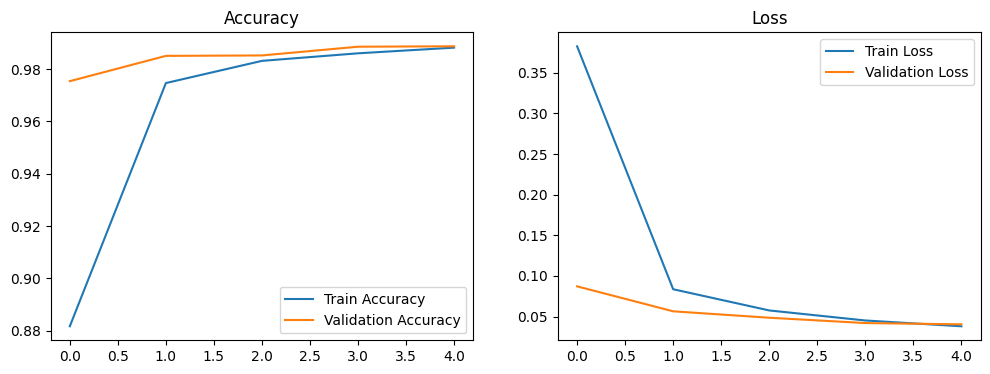

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


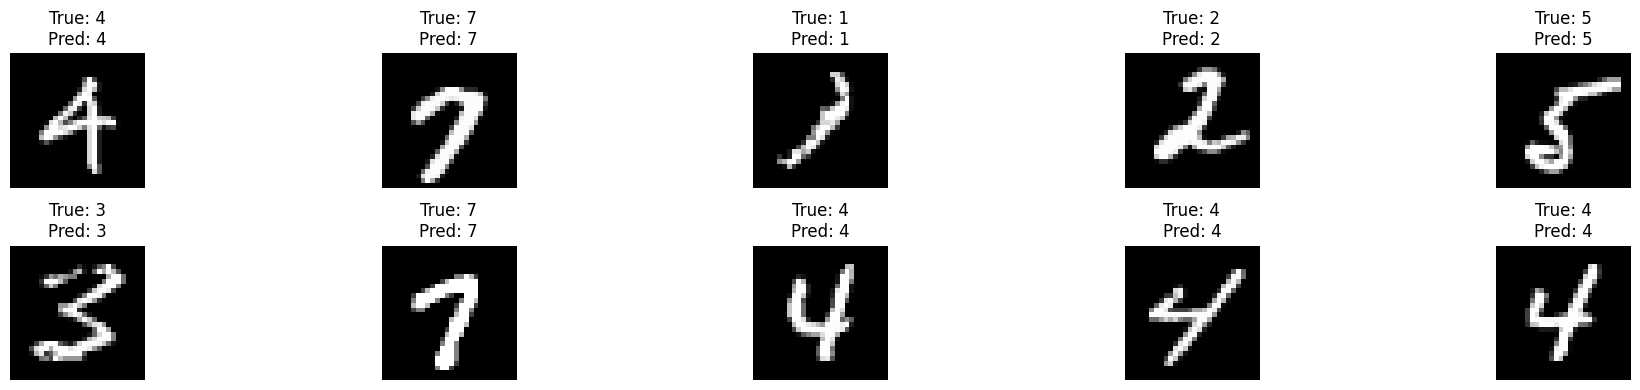

In [12]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=256, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()




[4-0]ReLU (learning_rate=0.001, epochs=10 batch_size=256)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7745 - loss: 0.8125 - val_accuracy: 0.9768 - val_loss: 0.0851
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9738 - loss: 0.0901 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9869 - loss: 0.0432 - val_accuracy: 0.9888 - val_loss: 0.0388
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9892 - val_loss: 0.0340
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9900 - val_loss: 0.0383
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0

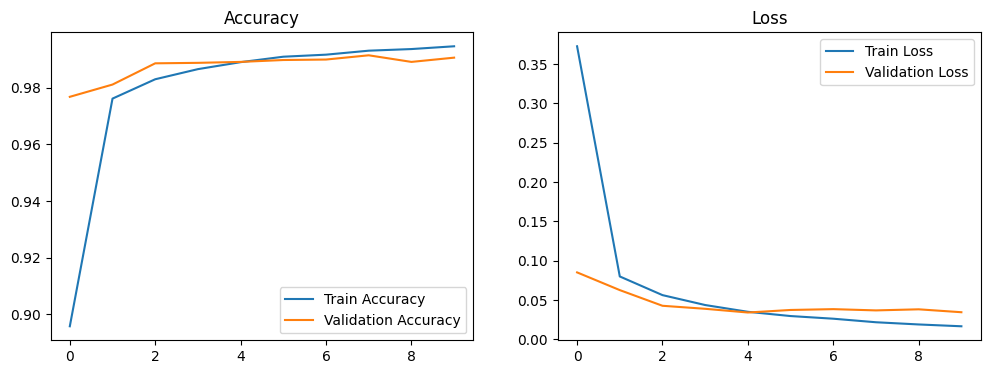

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


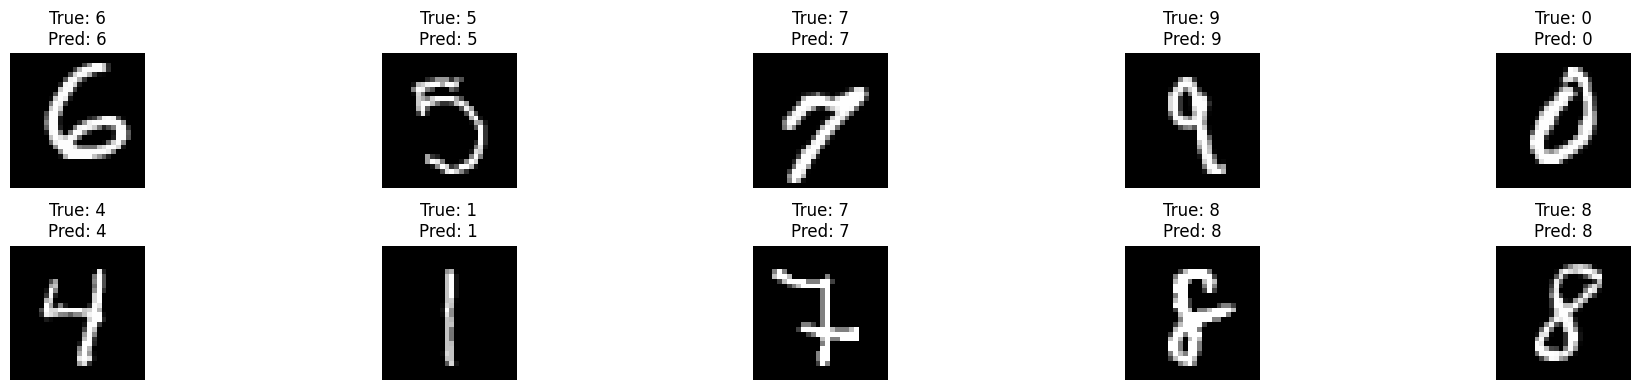

In [13]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()




[4-1]Sigmoid (learning_rate=0.001, epochs=10 batch_size=256)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1156 - loss: 2.3066 - val_accuracy: 0.5655 - val_loss: 1.4040
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7533 - loss: 0.7805 - val_accuracy: 0.9180 - val_loss: 0.2660
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9118 - loss: 0.2945 - val_accuracy: 0.9545 - val_loss: 0.1682
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9399 - loss: 0.1959 - val_accuracy: 0.9615 - val_loss: 0.1298
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9557 - loss: 0.1453 - val_accuracy: 0.9670 - val_loss: 0.1133
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9643 - loss: 0.1190 - val_accuracy: 0.9753 - val_loss: 0.0871
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9701 - loss: 0.0979 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9750 - loss: 0.0826 - val_accuracy: 0

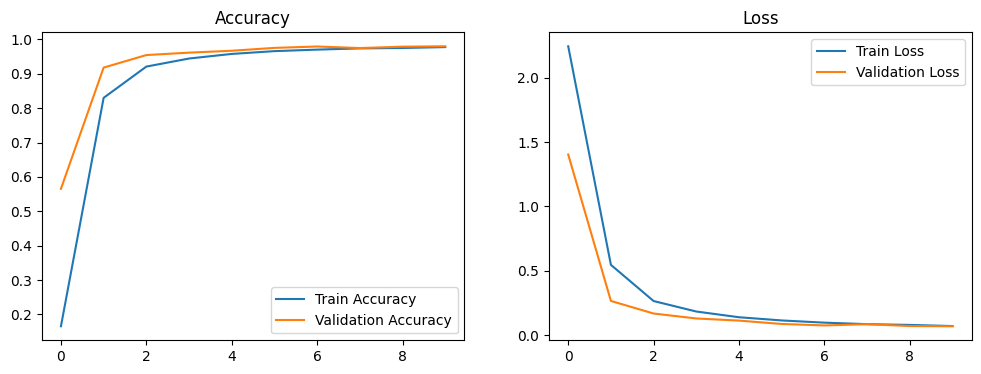

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


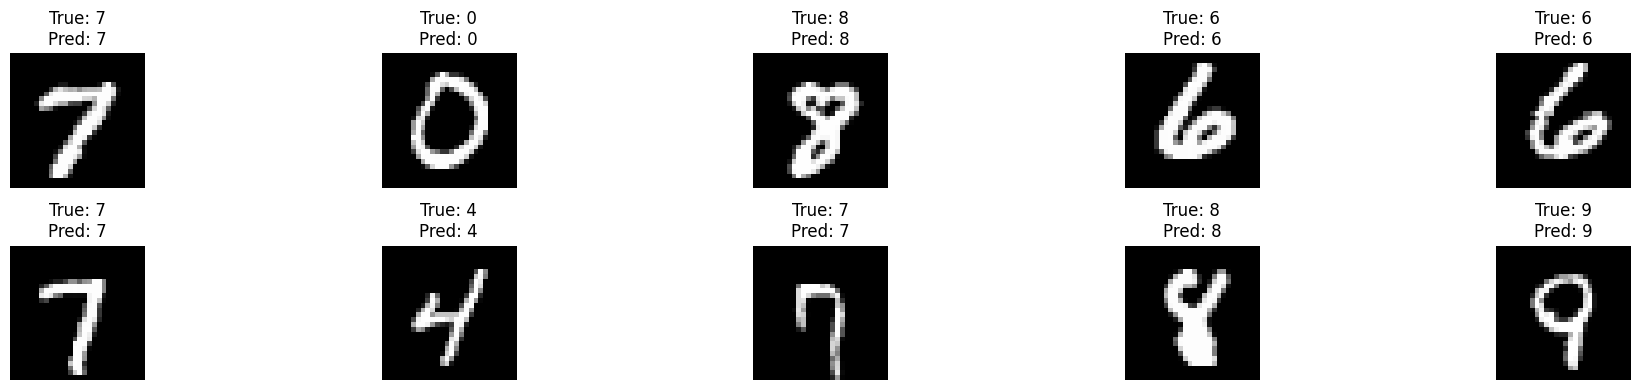

In [15]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


[4-2] tanh (learning_rate=0.001, epochs=10 batch_size=256)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7705 - loss: 0.7765 - val_accuracy: 0.9750 - val_loss: 0.0906
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9733 - loss: 0.0881 - val_accuracy: 0.9838 - val_loss: 0.0582
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0557 - val_accuracy: 0.9890 - val_loss: 0.0418
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9887 - val_loss: 0.0407
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9908 - val_loss: 0.0339
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0

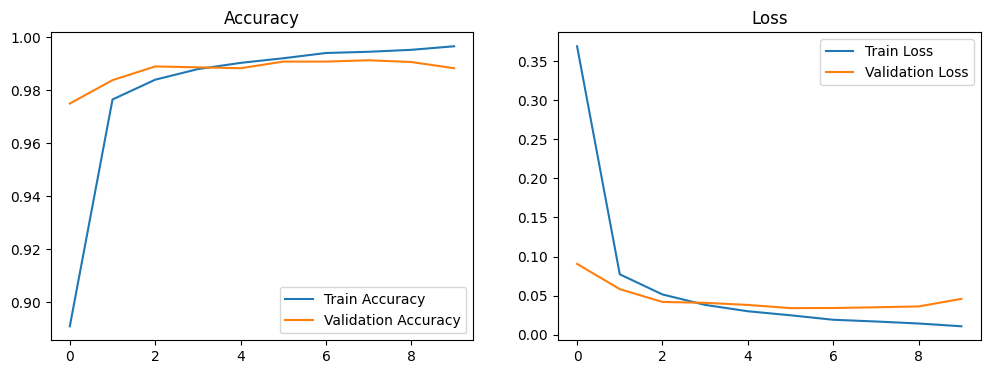

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


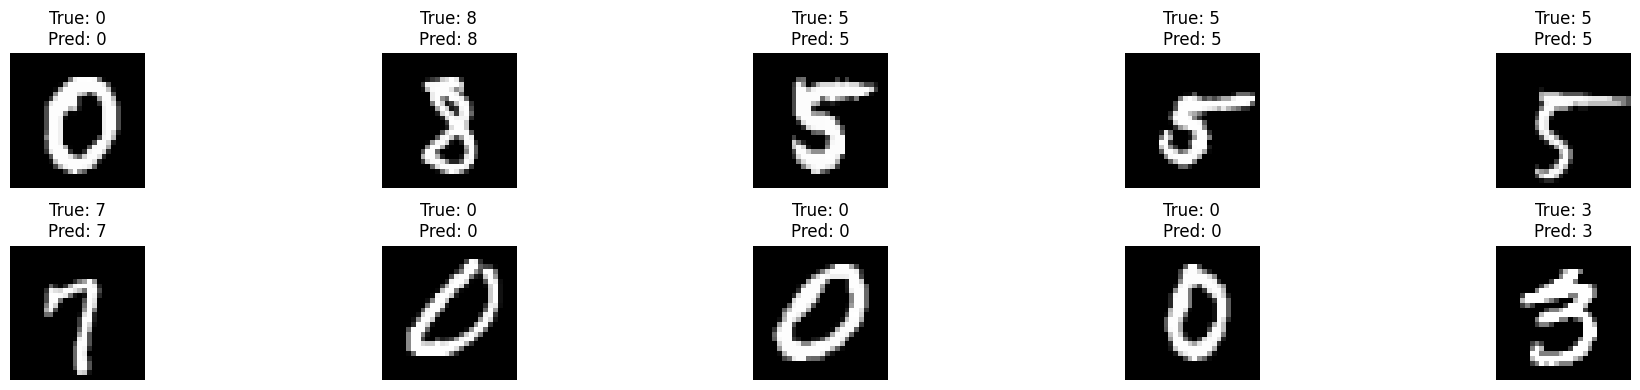

In [16]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


[5-0]Final Accuracy and Loss (learning_rate=0.001, epochs=30, batch_size=256, ReLU)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7670 - loss: 0.7669 - val_accuracy: 0.9787 - val_loss: 0.0820
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9729 - loss: 0.0907 - val_accuracy: 0.9842 - val_loss: 0.0551
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9820 - loss: 0.0586 - val_accuracy: 0.9873 - val_loss: 0.0439
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9835 - val_loss: 0.0525
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9892 - val_loss: 0.0371
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9908 - val_loss: 0.0340
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9915 - val_loss: 0.0342
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0

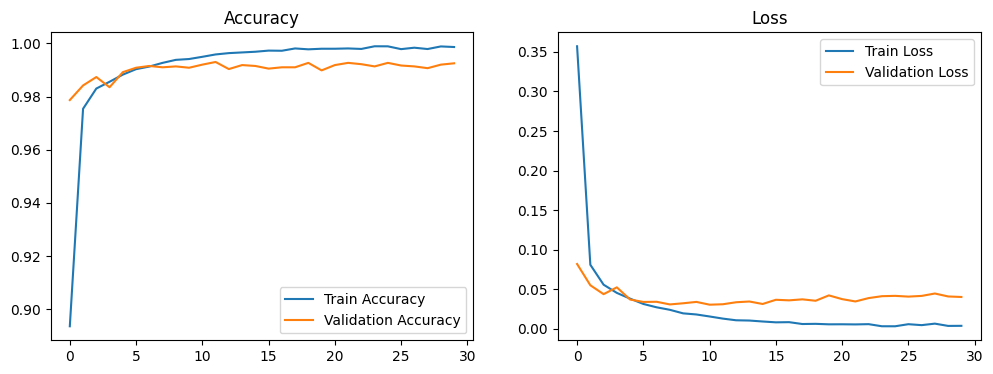

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


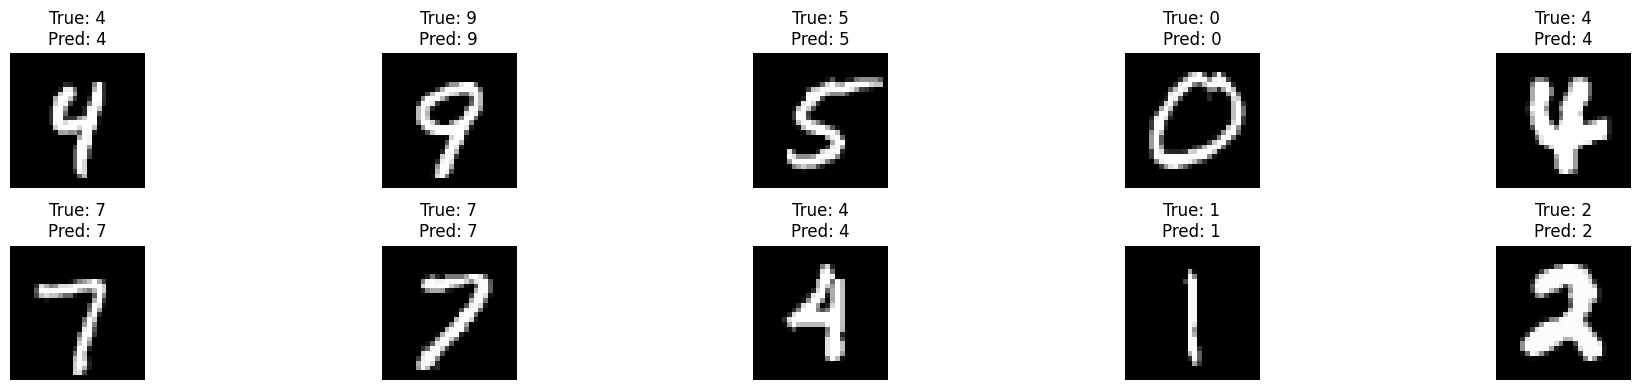

In [19]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)  # Add channel dimension
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


# Train the model
history = model.fit(train_images, train_labels, epochs=30, batch_size=256, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# Make predictions on test set
predictions = model.predict(test_images)

# Display some random test images with their predicted labels
num_rows, num_cols = 2, 5
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
